In [35]:
import pandas as pd
import numpy as np
# Analyse de données
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import scatter_matrix
# Découpage du dataset
from sklearn.model_selection import train_test_split
# modele
from sklearn.linear_model import LinearRegression
# métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [36]:
df = pd.read_csv('raw_data/carData.csv')

## Nettoyage et préparation des données

In [37]:
# Ajout de la variable âge : Car_Age
current_year = datetime.now().year
df['Car_Age'] = current_year - df['Year']

# Stratification de 'Selling_Price' en 'Price_Category'
df['Price_Category'] = np.ceil(df['Selling_Price'] /1.5)
df['Price_Category'].where(df['Price_Category'] <5, 5.0, inplace=True)

# Conversion des variables qualitatives en variables quantitatives
df["Fuel_Type_numeric"] = df["Fuel_Type"].map({"Petrol": 1, "Diesel": 2, "CNG": 3})
df["Seller_Type_numeric"] = df["Seller_Type"].map({"Dealer": 1, "Individual": 2})
df["Transmission_numeric"] = df["Transmission"].map({"Manual": 0, "Automatic": 1})

# Filtrer le DataFrame pour ne garder que les colonnes utiles, et sans la target
df_filtered = df[['Car_Age', 'Selling_Price', 'Present_Price','Kms_Driven', 'Owner',  "Fuel_Type_numeric", "Seller_Type_numeric", "Transmission_numeric"]]

# features
X = df_filtered[['Present_Price']]

# Target
y = df_filtered["Selling_Price"] 

C:\Users\coule\AppData\Local\Temp\ipykernel_14408\3729813044.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price_Category'].where(df['Price_Category'] <5, 5.0, inplace=True)


## Division du dataset : jeu d'entrainement, jeu de test

In [39]:
# Jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrainement du modèle

In [40]:
# Entraînement du modèle
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Prédiction

In [41]:
# Prédictions sur le set de test
y_pred = lin_reg.predict(X_test)

# Affichage des prédictions
y_pred

array([ 1.1039252 ,  7.7453588 ,  5.60460507,  1.1039252 , 10.29897217,
        5.3599475 ,  1.56265814,  1.26193322,  1.0886341 ,  5.88494187,
        5.82377747,  1.56265814,  6.9502217 ,  1.07334301,  5.60460507,
        3.30584332,  1.70537506, 10.31426327,  1.0886341 ,  1.74105429,
        1.18547773,  5.60460507,  5.60460507,  3.35681365,  1.31800057,
        4.27427954,  5.8594567 ,  3.7238    ,  1.56265814,  1.57794924,
        1.21453081,  7.9492401 ,  1.29761244,  4.45777271,  6.31309261,
        4.38131722,  8.29583833, 10.29897217,  3.06118575, 10.26329295,
        7.79632912,  7.10822971,  4.07549526,  1.22625399,  5.20193948,
        1.42503826,  7.7453588 , 12.44991997,  3.15802938,  4.27427954,
        5.60460507,  1.56265814, 19.14232389, 13.75476034,  5.60460507,
        7.7453588 ,  3.71870297,  6.72595226,  4.68713918,  5.14587213,
        1.10902223])

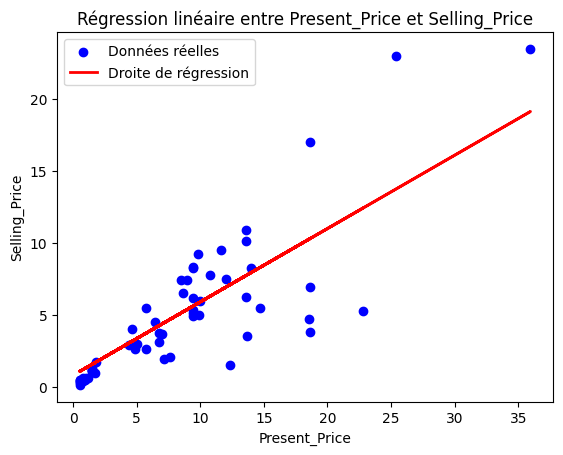

In [43]:
plt.scatter(X_test, y_test, color='blue', label="Données réelles")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Droite de régression")
plt.xlabel("Present_Price")
plt.ylabel("Selling_Price")
plt.title("Régression linéaire entre Present_Price et Selling_Price")
plt.legend()
plt.show()


## Métriques

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")


MAE: 1.8068994272334893, MSE: 7.202032610310123, RMSE: 2.6836603008410216
